In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data =  'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!python -m wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

C:\Users\Phyo Min Khant\anaconda3\Anaconda3\envs\ml-zoomcamp\python.exe: No module named wget


In [5]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [8]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [9]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [10]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [11]:
df.totalcharges = df.totalcharges.fillna(0)

In [12]:
df.churn = (df.churn == 'yes').astype(int)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [16]:


len(df_full_train), len(df_test)

(5634, 1409)

In [17]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25 , random_state=1)

In [18]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val   = df_val.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)

In [20]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [21]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [22]:
df_full_train = df_full_train.reset_index(drop = True)
df_full_train.churn.value_counts(normalize = True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [23]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [90]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [91]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [92]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [93]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [94]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [95]:
churn_no_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_no_partner

0.20503330866025166

In [96]:
churn_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_partner

0.3298090040927694

In [97]:
global_churn_rate - churn_no_partner

0.06493474245795922

In [98]:
global_churn_rate - churn_partner

-0.05984095297455855

In [99]:
from IPython.display import display
display?

In [100]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean']-global_churn_rate
    df_group['risk'] = df_group['mean']/global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [4]:
 from sklearn.metrics import mutual_info_score

In [102]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [103]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [104]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [105]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [106]:
for i in categorical:
    q = mutual_info_churn_score(df_full_train[i])
    print(i, q)

gender 0.0001174846211139946
seniorcitizen 0.009410216144208144
partner 0.009967689095399745
dependents 0.012345815445534689
phoneservice 0.00022871269738296285
multiplelines 0.0008574478744731856
internetservice 0.055867945893496467
onlinesecurity 0.06308524972985574
onlinebackup 0.0469234640537918
deviceprotection 0.04345286925268559
techsupport 0.06103245991777444
streamingtv 0.03185333110086085
streamingmovies 0.03158089669519908
contract 0.0983203874041556
paperlessbilling 0.01758882715925275
paymentmethod 0.043210027531582915


In [107]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [108]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [109]:
df_full_train[df_full_train.tenure <2 ].churn.mean()

0.6247464503042597

In [110]:
df_full_train[(df_full_train.tenure >2) & (df_full_train.tenure <20) ].churn.mean()

0.377466581795035

In [111]:
df_full_train[df_full_train.tenure >20 ].churn.mean()

0.15240963855421688

In [3]:
from sklearn.feature_extraction import DictVectorizer

In [113]:
df_train[['gender','contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [114]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [115]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [116]:
dv = DictVectorizer(sparse=False)

In [117]:
x_train = dv.fit_transform(train_dicts)
x_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [118]:
val_dicts = train_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [119]:
x_val = dv.transform(val_dicts)

In [120]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [121]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [122]:
z = np.linspace(-7,7,51)

In [123]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

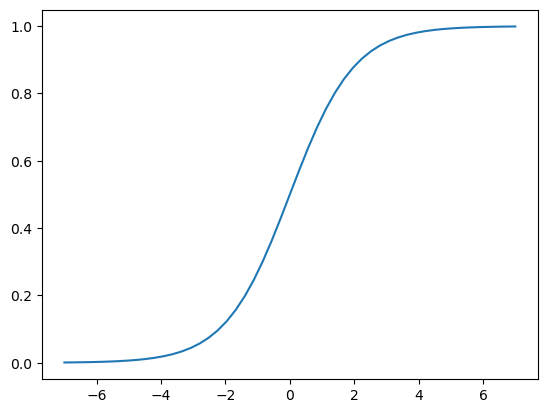

In [124]:
plt.plot(z, sigmoid(z))

In [129]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [130]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)    
    return result


In [2]:
from sklearn.linear_model import LogisticRegression

In [132]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [133]:
model.intercept_[0]

-0.10903162118335674

In [134]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [135]:
y_pred = model.predict_proba(x_val)[:,1]

In [136]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [137]:
df_val[churn_decision].customerid


3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [138]:
(y_val == churn_decision).mean()

0.8034066713981547

In [69]:
df_pred = pd.DataFrame()
df_pred
df_pred['probability'] = y_pred
df_pred['prediction']  = churn_decision.astype(int)
df_pred['actual']      = y_val

In [70]:
df_pred

,probability,prediction,actual
0,0.008996,0,0
1,0.204539,0,0
2,0.212240,0,0
3,0.543053,1,1
4,0.213801,0,0
...,...,...,...
1404,0.313697,0,0
1405,0.039358,0,1
1406,0.136388,0,0
1407,0.799782,1,1


In [71]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [72]:
df_pred

,probability,prediction,actual,correct
0,0.008996,0,0,True
1,0.204539,0,0,True
2,0.212240,0,0,True
3,0.543053,1,1,True
4,0.213801,0,0,True
...,...,...,...,...
1404,0.313697,0,0,True
1405,0.039358,0,1,False
1406,0.136388,0,0,True
1407,0.799782,1,1,True


In [73]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [74]:
small = ['contract', 'tenure', 'monthlycharges']

In [75]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [76]:
dicts_train_small = df_train[small].to_dict(orient='records')

In [77]:
dicts_val_small = df_val[small].to_dict(orient='records')

In [78]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [79]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [80]:
x_train_small = dv_small.transform(dicts_train_small)

In [81]:
model_small = LogisticRegression()
model_small.fit(x_train_small, y_train)

LogisticRegression()

In [82]:
w0 = model_small.intercept_[0]
w0

-2.476775658979276

In [83]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [84]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [85]:
sigmoid(w0)

0.07750241513453218

In [86]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [87]:
dv = DictVectorizer(sparse=False)
x_full_train = dv.fit_transform(dicts_full_train)

In [88]:
y_full_train = df_full_train.churn.values

In [89]:
model = LogisticRegression().fit(x_full_train, y_full_train)

In [90]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [91]:
x_test = dv.transform(dicts_test)

In [92]:
y_pred = model.predict_proba(x_val)[:,1]
y_pred

array([0.01054309, 0.16661655, 0.19319111, ..., 0.1357759 , 0.8126511 ,
       0.83522369])

In [93]:
churn_decision = (y_pred >= 0.5)

In [94]:
(churn_decision == y_val).mean()

0.8019872249822569

In [95]:
customer = dicts_test[-1]

In [96]:
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [97]:
x_small = dv.transform([customer])

In [98]:
x_small.shape

(1, 45)

In [99]:
model.predict_proba(x_small)[0, 1]

0.5968852088231275

In [100]:
y_test[-1]

1

In [101]:
len(y_val)

1409

In [102]:
(y_val == churn_decision ).sum()

1130

In [103]:
thresholds = np.linspace(0, 1, 21)
scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f  %.3f' %(t, score))
    scores.append(score)

NameError: name 'accuracy_score' is not defined

In [ ]:
plt.plot(thresholds, scores)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from collections import Counter

In [104]:
 Counter(y_pred >= 0.5)

NameError: name 'Counter' is not defined

In [105]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [106]:
t = 0.5
predict_positive = (y_pred >= t )
predict_negative = (y_pred < t  )

In [107]:
predict_positive [:5]

array([False, False, False,  True, False])

In [108]:
tp = (actual_positive & predict_positive).sum()
tn = (actual_negative & predict_negative).sum()

In [109]:
fp = (actual_negative & predict_positive).sum()
fn = (actual_positive & predict_negative).sum()

In [110]:
tp, tn, fp, fn

(210, 920, 103, 176)

In [111]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

In [112]:
confusion_matrix/ confusion_matrix.sum()

array([[0.65294535, 0.07310149],
       [0.12491128, 0.14904187]])

In [113]:
p = tp / (tp + fp)
p

0.670926517571885

In [114]:
r = tp / (tp + fn)
r

0.5440414507772021

In [115]:
tpr = tp / (tp + fn)
fpr = fp / (tn + fp)

In [116]:
tpr, fpr

(0.5440414507772021, 0.10068426197458455)

In [117]:
thresholds = np.linspace(0, 1, 101)
scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t )
    predict_negative = (y_pred < t  )

    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()

    fp = (actual_negative & predict_positive).sum()
    fn = (actual_positive & predict_negative).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [118]:
columns = ['thresholds', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)

In [119]:
df_scores[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,365,556,21,467,0.945596,0.543500
20,0.2,330,338,56,685,0.854922,0.330401
30,0.3,293,226,93,797,0.759067,0.220919
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,103,176,920,0.544041,0.100684
60,0.6,158,50,228,973,0.409326,0.048876
70,0.7,93,20,293,1003,0.240933,0.019550
80,0.8,17,2,369,1021,0.044041,0.001955
90,0.9,0,0,386,1023,0.000000,0.000000


In [120]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)

In [121]:
df_scores[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,365,556,21,467,0.945596,0.543500
20,0.2,330,338,56,685,0.854922,0.330401
30,0.3,293,226,93,797,0.759067,0.220919
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,103,176,920,0.544041,0.100684
60,0.6,158,50,228,973,0.409326,0.048876
70,0.7,93,20,293,1003,0.240933,0.019550
80,0.8,17,2,369,1021,0.044041,0.001955
90,0.9,0,0,386,1023,0.000000,0.000000


In [122]:
plt.plot(df_rand.thresholds, df_rand['tpr'], label='TPR')
plt.plot(df_rand.thresholds, df_rand['fpr'], label='FPR')
plt.legend()

NameError: name 'df_rand' is not defined

In [123]:
np.random.seed(1)
y_rand = np.random.uniform(0,1, size= len(y_val))


In [124]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [125]:
def tpr_fpr_Dataframe(y_val, y_pred):
    thresholds = np.linspace(0, 1, 101)
    scores = []

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t )
        predict_negative = (y_pred < t  )

        tp = (actual_positive & predict_positive).sum()
        tn = (actual_negative & predict_negative).sum()

        fp = (actual_negative & predict_positive).sum()
        fn = (actual_positive & predict_negative).sum()

        scores.append((t, tp, fp, fn, tn))

        columns = ['thresholds', 'tp', 'fp', 'fn', 'tn']
        df_scores = pd.DataFrame(scores, columns=columns)

        df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
        df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)

    return df_scores

In [126]:
df_rand = tpr_fpr_Dataframe(y_val, y_rand)

In [127]:
df_rand[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


In [128]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg,num_pos

(1023, 386)

In [129]:
y_ideal = np.repeat([0, 1], [num_neg,num_pos])

In [130]:
y_ideal_pred = np.linspace(0,1, len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [131]:
1 - y_val.mean()

0.7260468417317246

In [132]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [133]:
df_ideal = tpr_fpr_Dataframe(y_ideal, y_ideal_pred)

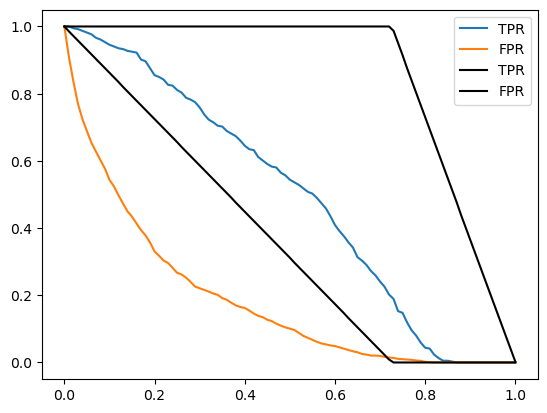

In [134]:
plt.plot(df_scores.thresholds, df_scores['tpr'], label='TPR')
plt.plot(df_scores.thresholds, df_scores['fpr'], label='FPR')

# plt.plot(df_rand.thresholds, df_rand['tpr'], label='TPR')
# plt.plot(df_rand.thresholds, df_rand['fpr'], label='FPR')

plt.plot(df_ideal.thresholds, df_ideal['tpr'], label='TPR', color='black')
plt.plot(df_ideal.thresholds, df_ideal['fpr'], label='FPR', color='black')

plt.legend()

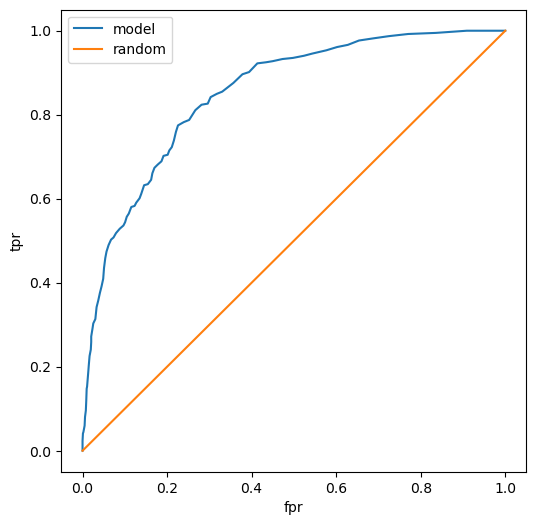

In [135]:
plt.figure(figsize=(6, 6))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0,1] , [0,1], label='random')
# plt.plot(df_rand.fpr, df_rand.tpr, label='rand')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('fpr')
plt.ylabel('tpr')

plt.legend()

In [136]:
from sklearn.metrics import roc_curve

In [137]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

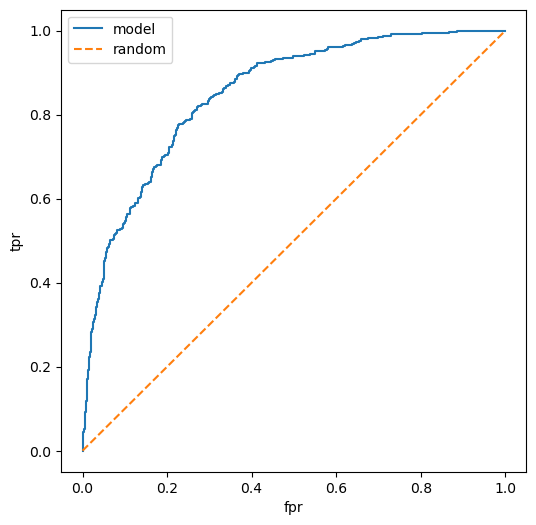

In [138]:
plt.figure(figsize=(6, 6))

plt.plot(fpr, tpr, label='model')
plt.plot([0,1] , [0,1], label='random', linestyle='--')
# plt.plot(df_rand.fpr, df_rand.tpr, label='rand')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('fpr')
plt.ylabel('tpr')

plt.legend()

In [139]:
from sklearn.metrics import auc

In [140]:
auc(fpr, tpr)

0.8510831193431895

In [141]:
auc(df_scores.fpr,df_scores.tpr)

0.8505943607899149

In [142]:
auc(df_ideal.fpr,df_ideal.tpr)

0.9999430203759136

In [143]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr,tpr)

0.8510831193431895

In [144]:
from sklearn.metrics import roc_auc_score

In [145]:
roc_auc_score(y_val, y_pred)

0.8510831193431895

In [146]:
y_val[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [147]:
y_pred[:10]

array([0.01054309, 0.16661655, 0.19319111, 0.6277843 , 0.21339861,
       0.2075503 , 0.02781757, 0.00344799, 0.52148528, 0.47696249])

In [148]:
y_pred[y_val == 0][:10]

array([0.01054309, 0.16661655, 0.19319111, 0.21339861, 0.2075503 ,
       0.02781757, 0.00344799, 0.06219645, 0.45906557, 0.07876201])

In [149]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [150]:
import random

In [151]:
n=10000
success = 0

for i in range(n):

    pos_ind = random.randint(0, len(pos) -1)
    neg_ind = random.randint(0, len(neg) -1)
    
    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n


0.8499

In [152]:
pos_ind, neg_ind

(258, 831)

In [153]:
pos[pos_ind] > neg[neg_ind]

False

In [154]:
n = 10000
pos_ind = np.random.randint(0, len(pos), size= n)
neg_ind = np.random.randint(0, len(neg), size= n)

In [155]:
(pos[pos_ind] > neg[neg_ind]).mean()

0.8406

In [156]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    x_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(x_train, y_train)
    
    return dv, model

In [157]:
dv, model = train(df_train, y_train, C=0.001)

In [158]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    x = dv.transform(dicts)
    y_pred = model.predict_proba(x)[:,1]
    
    return y_pred

In [159]:
y_pred = predict(df_val, dv, model)
y_pred

array([0.02155921, 0.33135098, 0.33602112, ..., 0.26705435, 0.71907523,
       0.71942517])

In [160]:
from sklearn.model_selection import KFold

In [161]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [162]:
!pip install tqdm

In [163]:
from tqdm.auto import tqdm

In [164]:
n_splits = 5
for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    scores = []
    
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val   = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print('C=%s %.3f +- %.3f '% (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009 
C=0.01 0.840 +- 0.009 
C=0.1 0.841 +- 0.008 
C=0.5 0.841 +- 0.007 
C=1 0.841 +- 0.008 
C=5 0.840 +- 0.007 
C=10 0.841 +- 0.008 


In [165]:
print('%.3f +- %.3f '% (np.mean(scores), np.std(scores)))

0.841 +- 0.008 


In [166]:
len(train_idx), len(val_idx)

(4508, 1126)

In [12]:
len(df_full_train)

NameError: name 'df_full_train' is not defined

In [170]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259

In [24]:
import pickle

In [25]:
C = 1

In [26]:
output_file = f'model_C={C}.bin'
output_file

'model_C=1.bin'

In [27]:
f_out = open(output_file, 'wb')
pickle.dump((dv, model), f_out)
f_out.close()

In [28]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

In [29]:
import pickle

In [30]:
model_file = 'model_C=10.bin'

In [31]:
with open(model_file, 'rb') as f_in:
    (dv, model) = pickle.load(f_in)

In [32]:
dv, model

(DictVectorizer(sparse=False), LogisticRegression(C=1, max_iter=1000))

In [33]:
customer = {'customerid': '9895-vfoxh',
 'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'tenure': 0,
 'phoneservice': 'no',
 'multiplelines': 'no_phone_service',
 'internetservice': 'dsl',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'monthlycharges': 29.4,
 'totalcharges': 29.4}

In [34]:
X = dv.transform([customer])

In [35]:
model.predict_proba(X)[0, 1]

0.5912654663253599

In [5]:
scikit-learn?

Object `learn` not found.


In [6]:
sklearn?

Object `sklearn` not found.


In [7]:
import sklearn

# Print the scikit-learn version
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.3.0
